<a href="https://colab.research.google.com/github/Rahul-Lakhate/AllProjects/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
import nltk

In [3]:
# Read in data
df = pd.read_excel("/content/P556.xlsx")
print(df.shape)

(1440, 3)


In [4]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [5]:
#EDA

/tmp/ipython-input-6-662998140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='coolwarm')


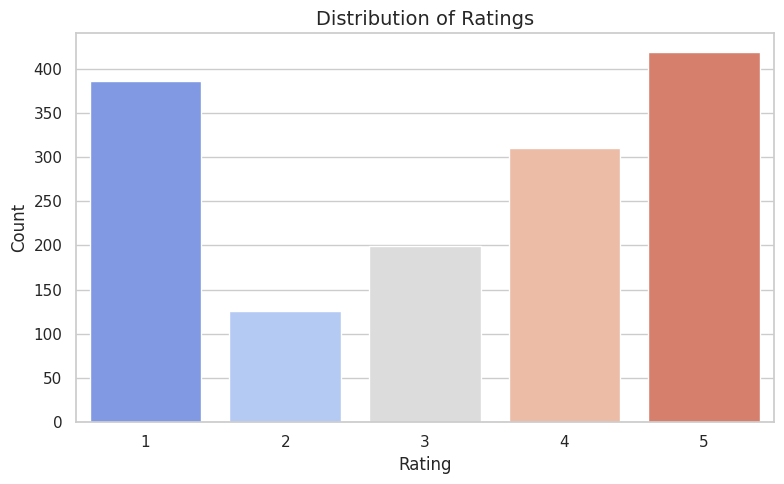

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating', palette='coolwarm')
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [7]:
#Basic NLT

In [8]:
example = df['body']
print(example)

0       Very disappointed with the overall performance...
1                                   Camera quality is low
2       Got the mobile on the launch date,Battery must...
3       1. It doesn't work with 5.0GHz WiFi frequency....
4       Not worth buying....faulty software, poor disp...
                              ...                        
1435                                     Excellent mobile
1436    All over mobile performance is very poor, neve...
1437    Battery life is good but camera clarity could ...
1438    It's a very bad product, highly dissatisfied.....
1439    The phone is a real beast the battery lasts ea...
Name: body, Length: 1440, dtype: object


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
tokens = example.apply(nltk.word_tokenize)
print(tokens.head())

0    [Very, disappointed, with, the, overall, perfo...
1                           [Camera, quality, is, low]
2    [Got, the, mobile, on, the, launch, date, ,, B...
3    [1, ., It, does, n't, work, with, 5.0GHz, WiFi...
4    [Not, worth, buying, ...., faulty, software, ,...
Name: body, dtype: object


In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['body']
    myid = row['title']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1440 [00:00<?, ?it/s]

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['body']
    myid = row['title']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1440 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, left_on='Id', right_on='title', how='left')

In [19]:
vaders.head()

,Id,neg,neu,pos,compound,title,rating,body
0,Horrible product,0.326,0.674,0.000,-0.5256,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,0.412,0.588,0.000,-0.2732,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,0.077,0.841,0.083,0.1027,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,0.194,0.783,0.023,-0.8923,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,0.270,0.730,0.000,-0.8033,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


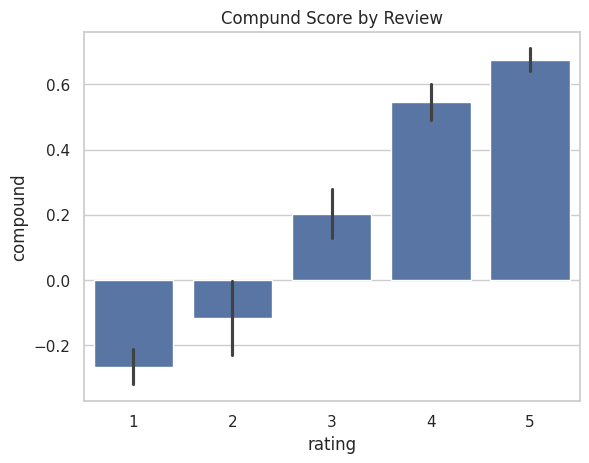

In [20]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Review')
plt.show()

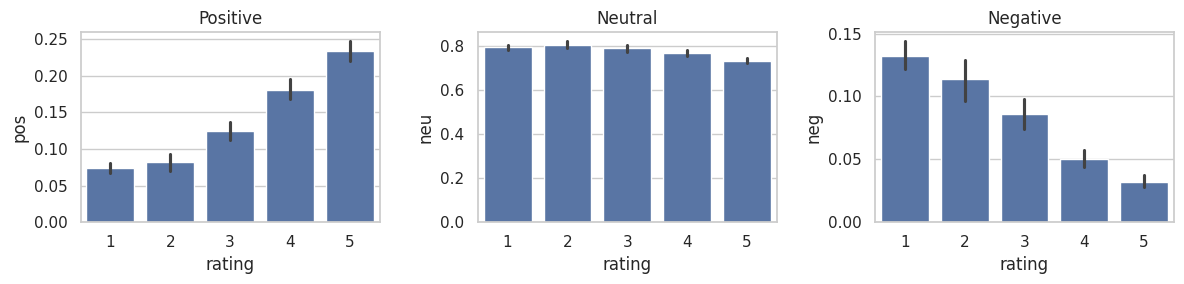

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [24]:
# VADER results on example
print(example.head())
sia.polarity_scores(example.iloc[0]) # Apply to the first element as an example

0    Very disappointed with the overall performance...
1                                Camera quality is low
2    Got the mobile on the launch date,Battery must...
3    1. It doesn't work with 5.0GHz WiFi frequency....
4    Not worth buying....faulty software, poor disp...
Name: body, dtype: object


{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.5256}

In [25]:
# Run for Roberta Model
res_roberta = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['body']
        myid = row['title']
        encoded_text = tokenizer(text, return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        scores_dict = {
            'roberta_neg' : scores[0],
            'roberta_neu' : scores[1],
            'roberta_pos' : scores[2]
        }
        res_roberta[myid] = scores_dict
    except RuntimeError:
        print(f'Broke for id: {myid}')

  0%|          | 0/1440 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Broke for id: Not So impressive,okay okay.Little over price
Broke for id: Camera
Broke for id: Prepared
Broke for id: STPL SUPPLIER SEND WRONG ITEM
Broke for id: असंतोषजनक
Broke for id: पैसे की बर्बादी है ये मोबाइल


In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['body']
        myid = row['title']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id: {myid}')

  0%|          | 0/1440 [00:00<?, ?it/s]

Broke for id: Not So impressive,okay okay.Little over price
Broke for id: Camera
Broke for id: Prepared
Broke for id: STPL SUPPLIER SEND WRONG ITEM
Broke for id: असंतोषजनक
Broke for id: पैसे की बर्बादी है ये मोबाइल


In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, left_on='Id', right_on='title', how='left')

In [29]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'title', 'rating', 'body'],
      dtype='object')

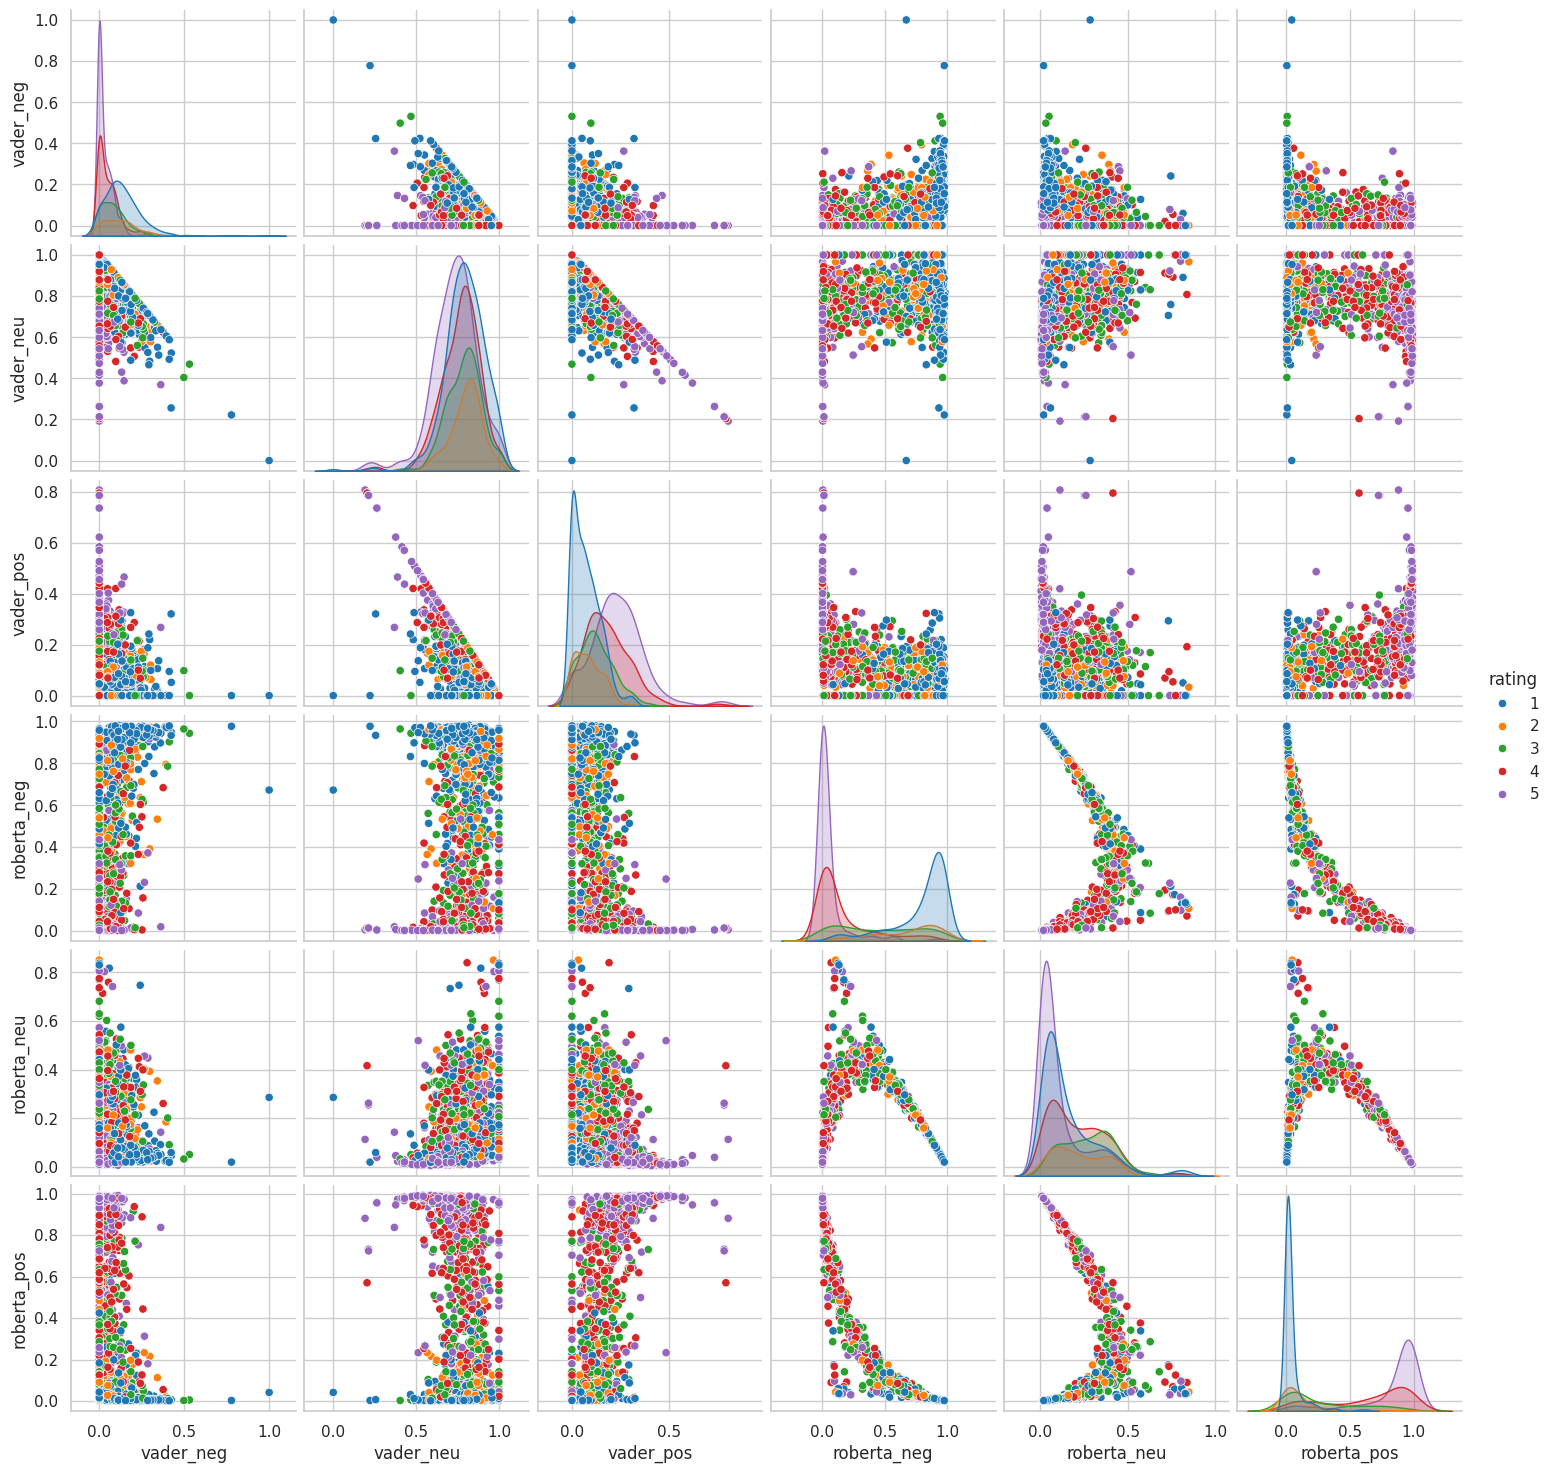

In [30]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [31]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['body'].values[0]

"bought on  Amazon festival sale. After 10 days received phone. To my surprise phone was not charging and on trouble shooting found issue in charging cable. Didn't expect this quality from Samsung. Delay  of delivery is pinching too. I could have bought in a in person store and avoided all these hassles. raised return but didn't get call even after 15days was forced to used phone and buy my own cable. if something goes wrong only god can save.. don't trust amazon nor these vendors.. amazon stopped picking my support calls."

In [32]:
results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['body'].values[0]

'Totally unsatisfied  new phone do not attach to car stereo voice outgoing problem talked to customer care 10 to.es did not got solution but thanks Amazon for their support  clearly disrecommend samsung worse brand ever'

In [33]:
results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['body'].values[0]

"The camera is not good! I have Redmi note 7 pro which is also 48mp but has a batter camera!The phone is very huge it is very heavy and fatIt should be slim!!I didn't liked it at all"

In [34]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [38]:
sent_pipeline('best')

[{'label': 'POSITIVE', 'score': 0.9997941851615906}]

In [39]:
sent_pipeline('worst')

[{'label': 'NEGATIVE', 'score': 0.9998016953468323}]

In [42]:
sent_pipeline('no')

[{'label': 'NEGATIVE', 'score': 0.9964459538459778}]

In [43]:
sent_pipeline('average')

[{'label': 'POSITIVE', 'score': 0.7222251296043396}]